<a href="https://colab.research.google.com/github/kingajutrzenka/case-study/blob/main/Regresja%20liniowa%20-%20case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresja liniowa - case study**

# Import i dane

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

def set_soft_dark_theme():
    """Ciemny styl – earthy dark"""
    palette = ["#E9D8A6", "#EE9B00", "#CA6702", "#BB3E03", "#9B2226"]
    sns.set_theme(
        style="darkgrid",
        rc={
            "axes.facecolor": "#222222",
            "figure.facecolor": "#222222",
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.labelcolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "text.color": "white",
            "grid.alpha": 0.3,
            "figure.dpi": 120,
            "savefig.dpi": 150,
        }
    )
    sns.set_palette(palette)
    return palette

In [133]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [134]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

In [135]:
df[df.duplicated()] # wyświetlamy duplikaty

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [136]:
df[df['charges'] == 1639.5631] # sprawdzamy duplikaty

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [137]:
df = df.drop_duplicates() # usuwamy duplikaty
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Typy object -> category

In [138]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object'] #przypisujemy listę tych kolumn
cat_cols

['sex', 'smoker', 'region']

In [139]:
for col in cat_cols:
    df[col] = df[col].astype('category') #zmiana typu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [140]:
df.describe().T #describe numerycznych

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [141]:
df.describe(include='category').T #describe kategorycznych

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


Rozkłady danych

Text(0.5, 1.0, 'Rozkład płci')

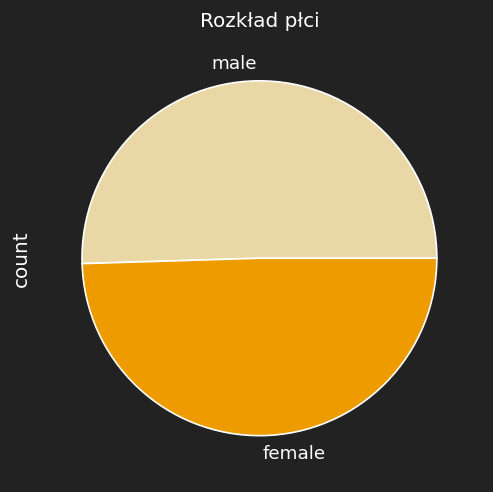

In [142]:
df.sex.value_counts().plot(kind='pie', color=set_soft_dark_theme())
plt.title('Rozkład płci')

Text(0.5, 1.0, 'Rozkład palaczy')

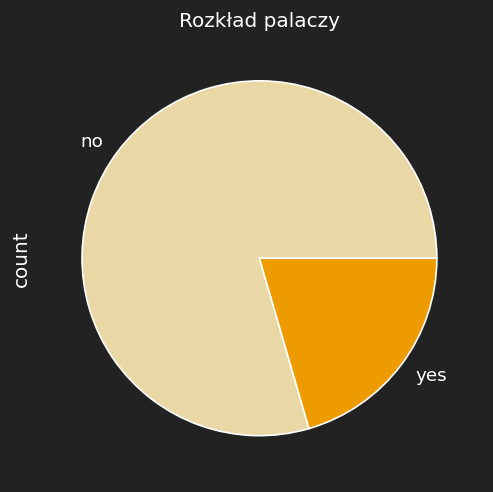

In [143]:
df.smoker.value_counts().plot(kind='pie', color=set_soft_dark_theme())
plt.title('Rozkład palaczy')

Text(0.5, 1.0, 'Rozkład regionów')

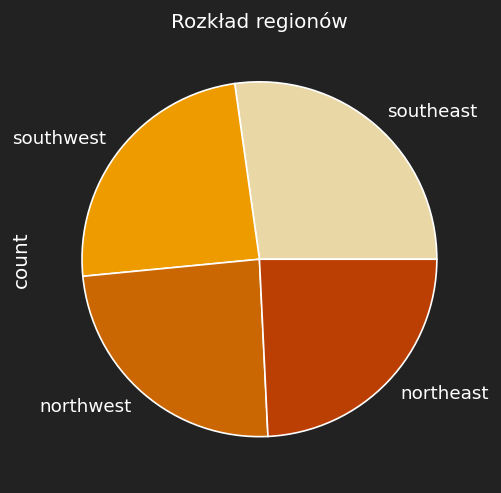

In [144]:
df.region.value_counts().plot(kind='pie', color=set_soft_dark_theme())
plt.title('Rozkład regionów')

Text(0.5, 1.0, 'Rozkład płci')

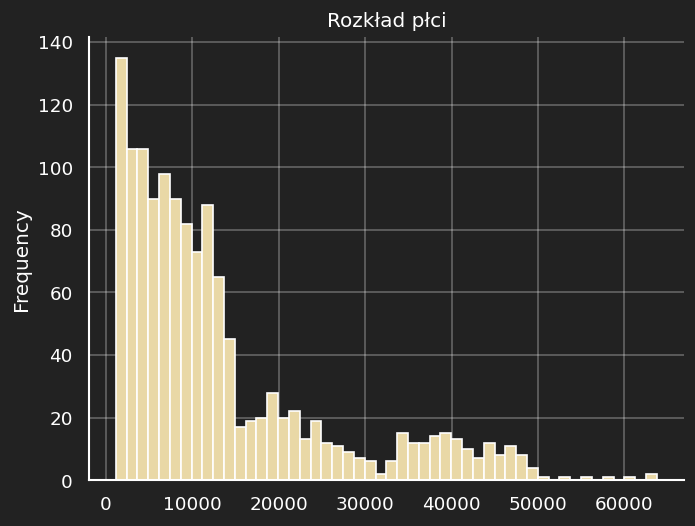

In [145]:
df.charges.plot(kind='hist', color=set_soft_dark_theme(), bins=50)
plt.title('Rozkład płci')

In [146]:
import plotly.express as px
px.histogram(df, x='charges', facet_col='smoker', facet_row='sex', color_discrete_sequence=set_soft_dark_theme())

In [147]:
px.histogram(df, x='smoker', facet_col='sex', color='sex', color_discrete_sequence=set_soft_dark_theme())

In [148]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype = 'int') #dyskretyzacja
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [149]:
corr = df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<Axes: >

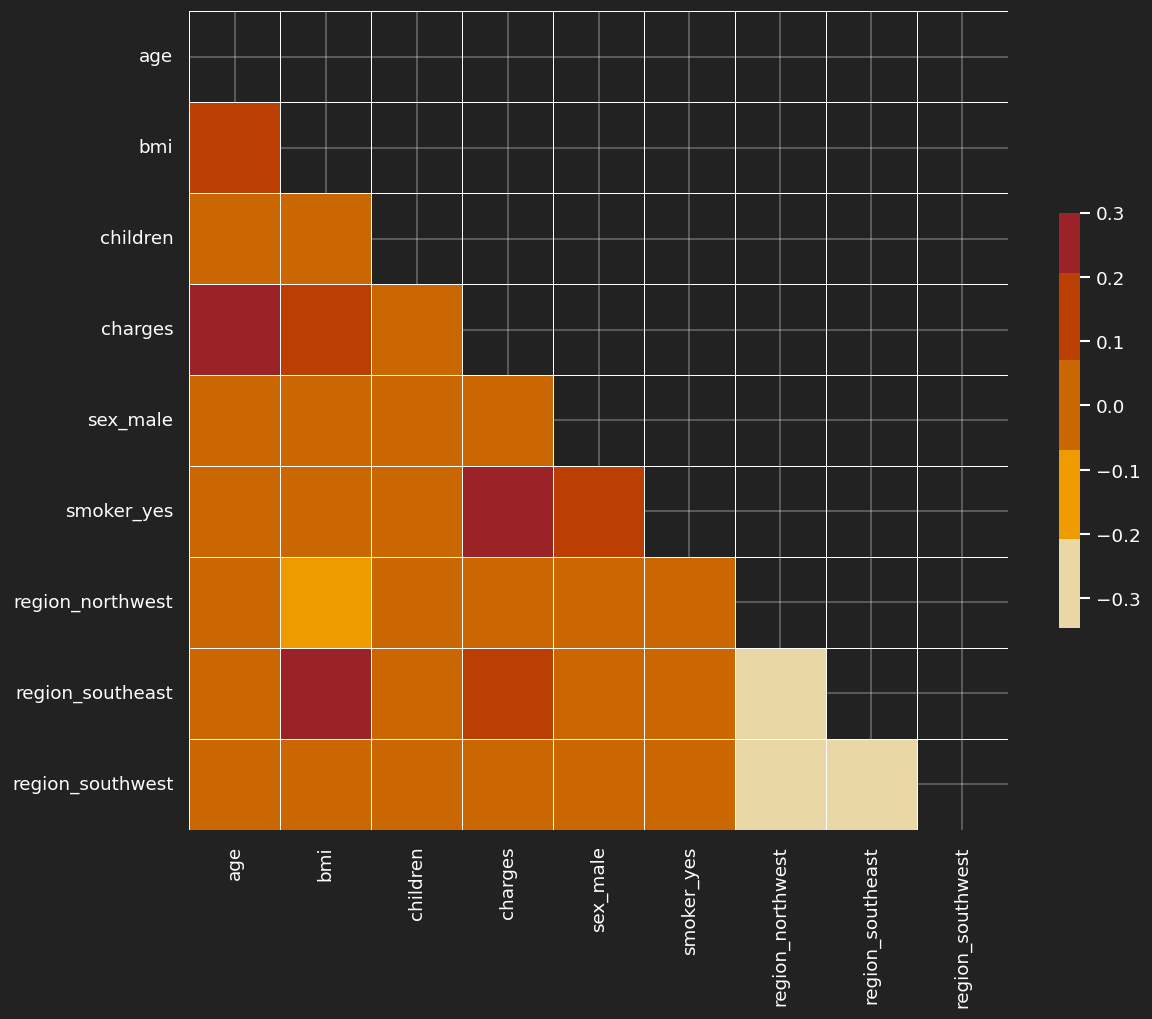

In [150]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Create a colormap from the list of colors
cmap = sns.color_palette(set_soft_dark_theme(), as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [151]:
df_dummies.corr()['charges'].sort_values(ascending=False) # im więcej tym bardziej corr

,charges
charges,1.000000
smoker_yes,0.787234
age,0.298308
bmi,0.198401
region_southeast,0.073578
children,0.067389
sex_male,0.058044
region_northwest,-0.038695
region_southwest,-0.043637


<Axes: >

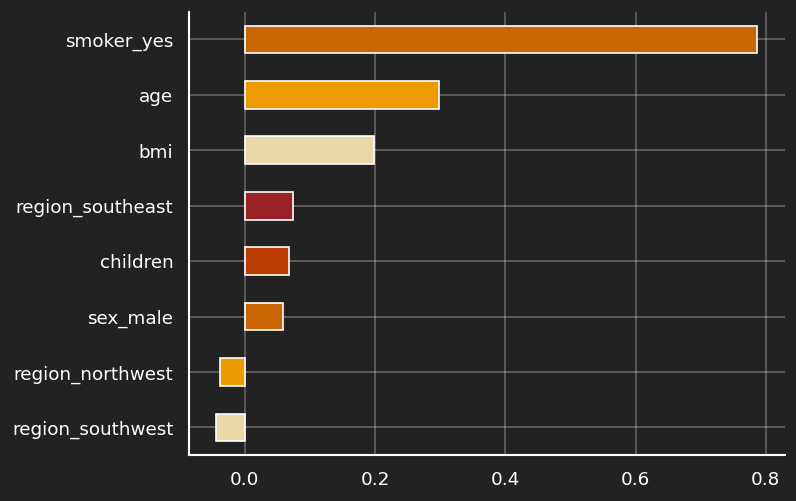

In [152]:
df_dummies.corr()['charges'].sort_values()[:-1].plot(kind='barh', color=set_soft_dark_theme())

In [153]:
data = df_dummies.copy() #dane
target = data.pop('charges') #opłaty
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [154]:
target.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# Podział danych na testowe i treningowe

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1069, 8) (1069,)
(268, 8) (268,)


# Regresja liniowa

In [156]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [157]:
regressor.score(X_test, y_test)

0.8069287081198011

In [158]:
y_pred = regressor.predict(X_test)
y_true = y_test.copy()

In [159]:
predictions = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
900,8688.85885,8143.693884,545.164966
1064,5708.86700,5737.115683,-28.248683
1256,11436.73815,14369.314876,-2932.576726
298,38746.35510,31745.513636,7000.841464
237,4463.20510,8962.386657,-4499.181557


Text(0.5, 1.0, 'Rozkład błędów')

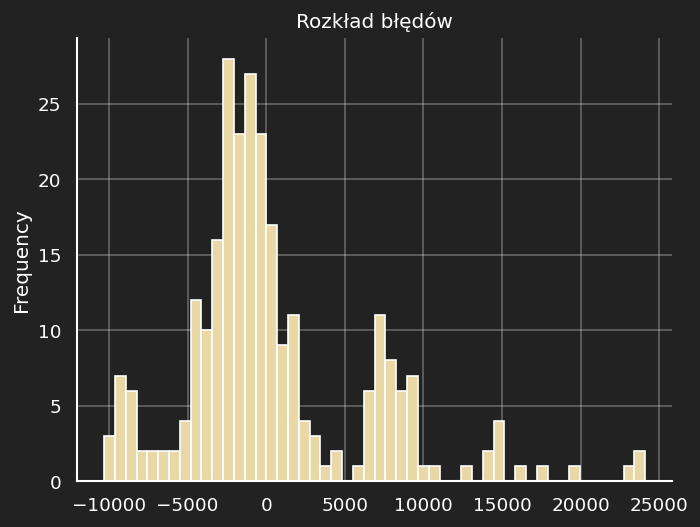

In [160]:
predictions.error.plot(kind='hist', color=set_soft_dark_theme(), bins=50)
plt.title('Rozkład błędów')

In [161]:
from sklearn.metrics import mean_squared_error
mea = mean_squared_error(y_true, y_pred)
print(f'MAE: {mea:.2f}')

MAE: 35478020.68


In [162]:
regressor.intercept_

np.float64(-11092.65229594595)

In [163]:
regressor.coef_

array([  248.2107,   318.7014,   533.01  ,  -101.5421, 23077.7646,
        -391.7615,  -838.9196,  -659.1398])

In [164]:
data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

# Eliminacja wsteczna

In [165]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[ 1.   , 23.   , 24.51 , ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 21.   , 25.745, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 52.   , 37.525, ...,  1.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 20.   , 22.   , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 38.   , 28.   , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 35.   , 35.86 , ...,  0.   ,  1.   ,  0.   ]])

In [166]:
ols = sm.OLS(y_train, X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.1
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          4.94e-295
Time:                        17:58:15   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+04   1114.260     -9.955      0.000   -1.33e+04   -8906.246
age                248.2107     13.507     18.376      0.000     221.707     274.715
bmi                318.7014     32.543      9.793      0.000     254.845     382.558
children           533.0100    156.796      3.399      0.001     225.344     840.676
sex_male          -101.5421    375.787     -0.270      0.787    -838.914     635.829
smoker_yes        2.308e+04    471.030     48.994      0.000    2.22e+04     2.4e+04
region_northwest  -391.7615    537.999     -0.728      0.467   -1447.426     663.903
region_southeast  -838.9196    546.101     -1.536      0.125   -1910.481     232.641
region_southwest  -659.1398    539.459     -1.222      0.222   -1717.668     399.388
==============================================================================
Omnibus:                      266.561   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.069
Skew:                           1.330   Prob(JB):                    3.77e-140
Kurtosis:                       5.710   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 6, 7, 8]] # usuwamy sex male ( 4 liczone z const)
predictors.remove('sex_male')

ols = sm.OLS(y_train, X_selected).fit()
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     409.6
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          2.44e-296
Time:                        17:58:15   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.113e+04   1102.801    -10.097      0.000   -1.33e+04   -8970.891
age                248.3291     13.494     18.402      0.000     221.850     274.808
bmi                318.2418     32.485      9.797      0.000     254.500     381.983
children           533.0663    156.728      3.401      0.001     225.535     840.598
smoker_yes        2.307e+04    469.131     49.170      0.000    2.21e+04     2.4e+04
region_northwest  -392.5326    537.756     -0.730      0.466   -1447.719     662.654
region_southeast  -835.7955    545.740     -1.531      0.126   -1906.647     235.056
region_southwest  -656.0584    539.102     -1.217      0.224   -1713.886     401.770
==============================================================================
Omnibus:                      266.747   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.968
Skew:                           1.330   Prob(JB):                    2.41e-140
Kurtosis:                       5.712   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 7, 8]]
predictors.remove('region_northwest')

ols = sm.OLS(y_train, X_selected).fit()
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     478.0
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.40e-297
Time:                        17:58:15   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1062   BIC:                         2.171e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.132e+04   1072.467    -10.557      0.000   -1.34e+04   -9217.200
age                248.4224     13.491     18.414      0.000     221.951     274.894
bmi                317.6363     32.467      9.783      0.000     253.930     381.343
children           531.0554    156.669      3.390      0.001     223.640     838.471
smoker_yes        2.308e+04    468.649     49.250      0.000    2.22e+04     2.4e+04
region_southeast  -633.8835    470.340     -1.348      0.178   -1556.785     289.018
region_southwest  -454.7878    463.150     -0.982      0.326   -1363.580     454.005
==============================================================================
Omnibus:                      266.297   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.848
Skew:                           1.329   Prob(JB):                    6.94e-140
Kurtosis:                       5.706   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 8]]
predictors.remove('region_southeast')

ols = sm.OLS(y_train, X_selected).fit()
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.37e-298
Time:                        17:58:15   Log-Likelihood:                -10832.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1063   BIC:                         2.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.119e+04   1068.736    -10.475      0.000   -1.33e+04   -9097.635
age                249.3083     13.480     18.495      0.000     222.858     275.759
bmi                305.0617     31.109      9.806      0.000     244.019     366.104
children           537.1430    156.664      3.429      0.001     229.737     844.549
smoker_yes        2.303e+04    467.492     49.269      0.000    2.21e+04     2.4e+04
region_southwest  -232.1923    432.865     -0.536      0.592   -1081.559     617.174
==============================================================================
Omnibus:                      264.792   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.745
Skew:                           1.323   Prob(JB):                    1.47e-138
Kurtosis:                       5.692   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5]]
predictors.remove('region_southwest')

ols = sm.OLS(y_train, X_selected).fit()
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     716.3
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          5.56e-300
Time:                        17:58:15   Log-Likelihood:                -10832.
No. Observations:                1069   AIC:                         2.167e+04
Df Residuals:                    1064   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.126e+04   1062.104    -10.599      0.000   -1.33e+04   -9172.693
age          249.1913     13.474     18.495      0.000     222.753     275.629
bmi          305.2674     31.097      9.817      0.000     244.250     366.285
children     537.9722    156.604      3.435      0.001     230.685     845.260
smoker_yes  2.304e+04    467.005     49.341      0.000    2.21e+04     2.4e+04
==============================================================================
Omnibus:                      265.622   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.039
Skew:                           1.326   Prob(JB):                    2.83e-139
Kurtosis:                       5.700   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Eliminacja wsteczna automatyzacja XD

In [177]:
import pandas as pd
import statsmodels.api as sm

SL = 0.05

Xdf = X_train.copy()
Xdf = sm.add_constant(Xdf, has_constant='add')
current = list(Xdf.columns)

while True:
    model = sm.OLS(y_train, Xdf).fit()

    p = model.pvalues.drop(labels=['const'], errors='ignore')
    worst_p = p.max()
    if worst_p <= SL:
        break
    worst_feat = p.idxmax()
    Xdf = Xdf.drop(columns=[worst_feat])
    current.remove(worst_feat)

print(model.summary(xname=current))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     716.3
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          5.56e-300
Time:                        18:03:28   Log-Likelihood:                -10832.
No. Observations:                1069   AIC:                         2.167e+04
Df Residuals:                    1064   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.126e+04   1062.104    -10.599      0.0

# Zapisanie końcowego modelu

In [178]:
ols.save('model.pickle')